### Ejercicio 2

Comenzaremos con un conjunto de datos de ejemplo 2D que puede estar separado por un límite lineal. El script trazará los datos de entrenamiento. En este conjunto de datos, las posiciones de los ejemplos positivos (indicados con +) y los ejemplos negativos (indicados con o) sugieren una separación natural indicada por la brecha. Sin embargo, observe que hay un ejemplo negativo atípico o en el extremo izquierdo aproximadamente (0.1, 4.1). Como parte de este ejercicio, también verá cómo este valor atípico afecta el límite de decisión de SVM.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, min_x, max_x, linestyle, label,color):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label,color= color)

***En esta parte del ejercicio, debe utilizar diferentes valores del parámetro $C$ con SVM. El parámetro $C$ es un valor positivo que controla la penalización para datos de entrenamiento mal clasificados. Un parámetro $C$ grande le indica al SVM que intente clasificar todos los ejemplos correctamente. $C$ juega un papel similar a $\frac{1}{\lambda}$, donde $\lambda$ es un parámetro de regularización.***

***La siguiente parte es ejecutar el entrenamiento SVM (con $C = 1$) usando el software SVM que he incluido con el código al inicio. Cuando $C = 1$, debería encontrar que SVM coloca el límite de decisión en el espacio entre los dos conjuntos de datos y clasifica erróneamente el punto de datos en el extremo izquierdo. ***

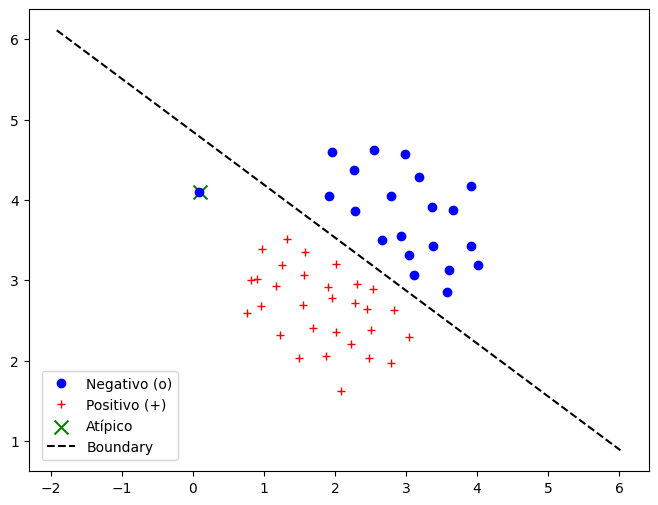

In [9]:
########################################################################################
#cargar dataset1
url_data = 'https://raw.githubusercontent.com/cam2149/MachineLearningIII/refs/heads/main/dataset1.data'
data=np.loadtxt(url_data,delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################

# Definimos el punto atípico

x_outlier = np.array([[0.1, 4.1]])
y_outlier = np.array([0])

##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ob', label='Negativo (o)')  # Azul para la clase negativa (o)
plt.plot(X[Y == 0, 0], X[Y == 0, 1], '+r', label='Positivo (+)')  # Rojo para la clase positiva (+)
plt.scatter(x_outlier[:, 0], x_outlier[:, 1], color='green', marker='x', s=100, label='Atípico', edgecolor='green')

#create classifiers
C = 1  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label='Boundary', color='black')
plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.01))

Cuando se reduce el valor de C = 1, el modelo se vuelve mas tolerante con los errores de clasificación lo cual tiene un impacto directo en la influencia de los puntos atípicos sobre la frontera de decisión. El modelo ha sacrificado clasificarlo correctamente en favor de un margen mas amplio y generalizado

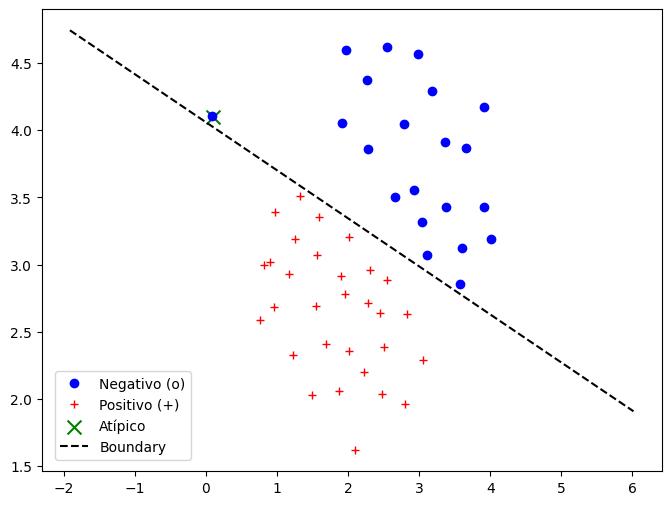

In [10]:
# Definimos el punto atípico

x_outlier = np.array([[0.1, 4.1]])
y_outlier = np.array([0])

##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'ob', label='Negativo (o)')  # Azul para la clase negativa (o)
plt.plot(X[Y == 0, 0], X[Y == 0, 1], '+r', label='Positivo (+)')  # Rojo para la clase positiva (+)
plt.scatter(x_outlier[:, 0], x_outlier[:, 1], color='green', marker='x', s=100, label='Atípico', edgecolor='green')

#create classifiers
C = 100  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label='Boundary', color='black')
plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.01))

Un valor de C = 100, obliga al modelo a optimizar el ajuste a los datos de entrenamiento a costa de comprometer la generalización y la representatividad del limite de decision. Intenta acomodar todos los puntos incluyendo valores atípicos o ruido en los datos. El modelo pierde simplicidad  y puede no reflejar la verdadera separación entre las clases.

***Su tarea es probar diferentes valores de $C$ en este conjunto de datos. Específicamente, debes cambiar el valor de $C$ en el script a $C = 100$ y ejecutar el entrenamiento SVM nuevamente. Cuando $C = 100$, debería encontrar que SVM ahora clasifica cada ejemplo correctamente, pero tiene un límite de decisión que no parece ser un ajuste natural para los datos. Argumente su respuesta***

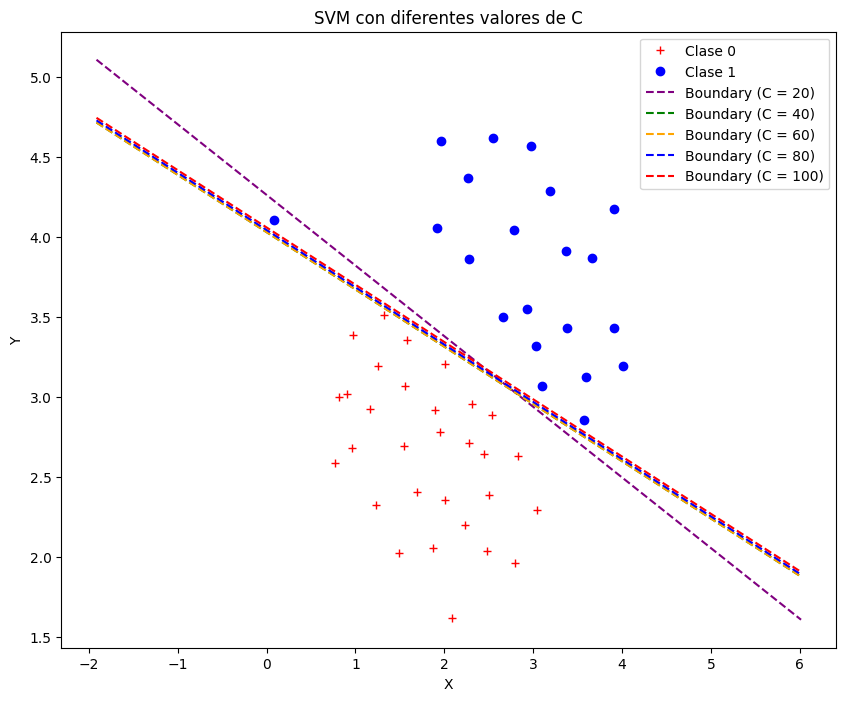

In [11]:
##graficar datos
plt.figure(figsize=(10, 8))

plt.plot(X[Y==0,0],X[Y==0,1],'+r', label='Clase 0')
plt.plot(X[Y==1,0],X[Y==1,1],'ob', label='Clase 1')

# Valores de C a probar
C_values = [20, 40, 60, 80, 100]
colors = ['purple', 'green', 'orange', 'blue', 'red']


for i, C in enumerate(C_values):
    #create classifiers
    clf_lin  = svm.SVC(kernel='linear',C=C)

    #entrenar
    clf_lin.fit(X, Y)

    #graficar frontera
    min_x=X[:,0].min()
    max_x=X[:,0].max()
    plot_hyperplane(clf_lin, min_x, max_x, 'k--', f'Boundary (C = {C})', colors[i])


plt.legend()
plt.title('SVM con diferentes valores de C')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

C es un hiperparámetro que controla el equilibrio entre el ajuste del modelo y la regularización en las máquinas de soporte vectorial (SVM). Su función es regular la penalización por los errores de clasificación.

Cada vez que bajamos el valor de C, el modelo es mas permisivo con los errores de clasificación en el conjunto de entrenamiento, permitiendo que algunos puntos de entrenamiento se clasifiquen de manera incorrecta. Esto genera un margén mas amplio entre las clases incluso si esto implica clasificar incorrectamente algunos puntos. El modelo es menos propenso a sobreajustarse lo que puede mejorar su rendimiento en sus datos nuevos. Los puntos atípicos tienen menos influencia en la posición de la frontera de decisión haciendola mas robusta.

Cada vez que aumentamos el valor de C, el modelo de SVM se vuelve mas estricto con los errores de clasificación en el conjunto de entrenamiento, lo cual indica que el margen es mas ajustado, es decir, el modelo intenta minimizar los errores clasificando correctamente la mayor cantidad de puntos de entrenamiento lo que puede reducir el margen entre las clases. El modelo se adapta mas a los datos de entrenamiento lo cual aumenta el riesgo de sobreajuste si contienen ruido o puntos atípicos.